In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def GetPlateData(path):
    data=pd.read_csv(path,skiprows = 6).dropna(axis=1)
    data.dropna(axis=1)

    data.rename(columns = {'Unnamed: 0':'WellLetter','Unnamed: 1':'WellNumber','Unnamed: 2':'SampleID',}, inplace = True)
    # Cleaning
    data.dropna(inplace = True, how = 'all')
    # Get rid of unused wells
    unused_wells = data['SampleID'].str.contains('unused')
    data = data.loc[unused_wells == False]
    # The well letters and well numbers are seperate, so I'm combining them
    WellIndex = data.loc[:,'WellLetter'].str.cat(data.loc[:,'WellNumber'].astype(str))
    data.index = WellIndex
    data.drop(['WellLetter','WellNumber'],inplace=True,axis =1) # Don't need these anymore
    data = data.loc[:,'220':].dropna(axis = 1) # Numerical data only!
    data.columns = data.columns.astype(int) # useful for indexing and plotting
    # zero at 800 nm
    data.reset_index(drop=True,inplace=True) # otherwise SUBTRACT can't match up cells
    data = data.subtract(data.loc[:,800],axis=0)
    data.index = WellIndex
    return data

data=GetPlateData('20191101_LB.CSV')

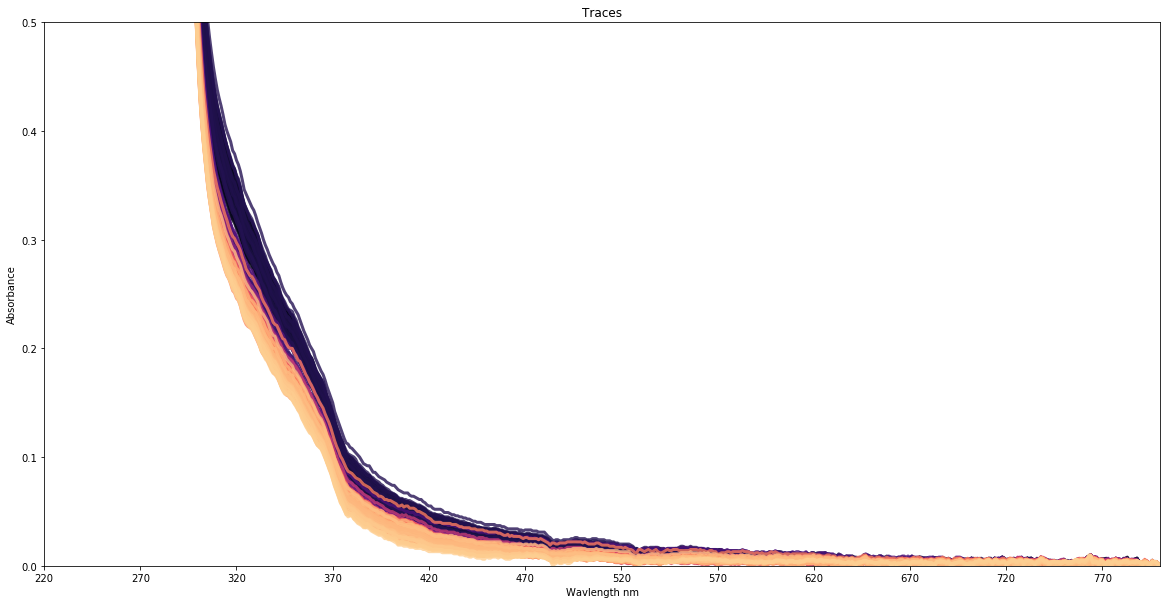

In [71]:
def PlotTrace(trace,title,legend=False, save=False):
        # Checking the column headers are integers
        if type(trace.columns) != 'pandas.core.indexes.numeric.Int64Index':
            trace.columns=trace.columns.astype(int)

    
        # Define figure + set the colorcyle to a continuous color map
        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_prop_cycle('color',plt.cm.magma(np.linspace(0,0.9,len(trace))))

        #Plot each trace idividually
        for i in range(len(trace)):
            y = trace.iloc[i,:]
            plt.plot(trace.columns,y, lw = 3, alpha = 0.8)

        plt.title(title)
        plt.xticks(trace.columns[::50])
        plt.xlim((220,800))
        plt.ylim((0,0.5))
        plt.xlabel('Wavlength nm')
        plt.ylabel('Absorbance')
        if legend:
            plt.legend(trace.index)
        if save:
            plt.savefig(title.replace(' ','_')+'.png')
            plt.close()
            return title.replace(' ','_')+'.png'
        else:
            plt.show()
            
PlotTrace(data,'Traces')

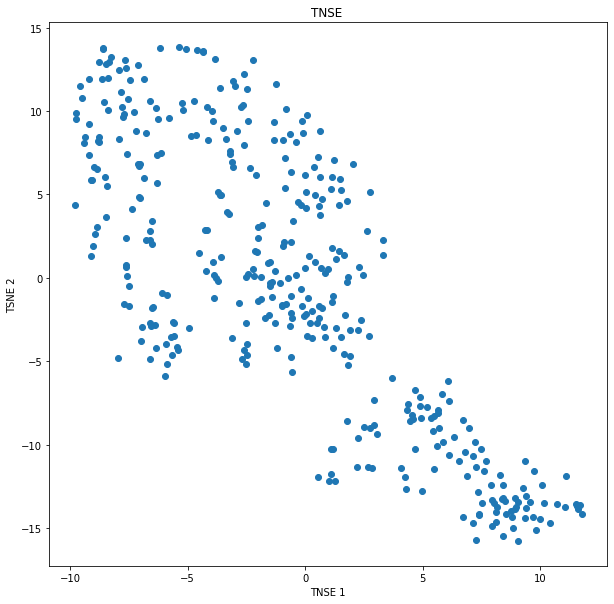

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity = 50)
            
embeddings = tsne.fit_transform(data)

plt.figure(figsize = (10,10))
plt.scatter(embeddings[:,0],embeddings[:,1])
plt.title('TNSE ')
plt.xlabel('TNSE 1')
plt.ylabel('TSNE 2')
plt.show()

I tested the dispensing with my protein with the following vols in each well:
1-5: 5ul
6-10: 10ul
11-15: 15 ul
16-20: 20ul
21-24: 25ul

I Made a working stock of BM3 WT Heme that I expressed and purified last week.
Here's a trace:
[20191104_BM3Conccheck.csv](20191104_BM3Conccheck.csv)

![](20191104_BM3Conccheck.csv_PLOT.png)

I ended up using  the 10 in 1000 dilution, which is 5.90 uM

In [5]:
ProteinData = GetPlateData('20191104_wellvolumes.CSV')
ProteinData

,220,221,222,223,224,225,226,227,228,229,...,791,792,793,794,795,796,797,798,799,800
WellLetter,,,,,,,,,,,,,,,,,,,,,
A1,3.248,2.091,3.248,2.369,2.460,3.248,3.248,3.069,3.248,3.248,...,0.003,0.004,0.004,0.003,0.005,0.004,0.005,0.003,0.000,0.0
B1,2.620,2.620,2.620,1.669,2.620,2.620,2.620,2.620,2.620,2.620,...,0.007,0.008,0.009,0.005,0.005,0.005,0.006,0.003,0.000,0.0
C1,2.343,2.532,3.391,2.405,3.391,3.391,3.157,2.529,3.056,3.391,...,0.002,0.005,0.006,0.004,0.005,0.005,0.005,0.002,0.000,0.0
D1,3.287,3.287,3.287,3.287,3.287,3.287,3.287,3.287,3.287,2.983,...,0.002,0.004,0.003,0.002,0.003,0.003,0.003,0.002,0.000,0.0
E1,2.421,2.421,2.421,2.421,2.421,2.421,2.421,2.421,2.421,2.421,...,0.005,0.008,0.007,0.007,0.007,0.008,0.008,0.003,-0.002,0.0
F1,3.128,3.128,3.128,3.128,3.128,3.128,3.128,3.128,3.128,3.128,...,0.004,0.005,0.007,0.004,0.006,0.006,0.005,0.003,0.002,0.0
G1,2.965,2.965,2.965,2.965,2.728,2.965,2.965,2.965,2.965,2.965,...,0.003,0.005,0.005,0.004,0.005,0.006,0.007,0.004,0.002,0.0
H1,2.858,2.858,2.858,2.858,2.858,2.858,2.858,2.858,2.858,2.858,...,0.004,0.007,0.006,0.006,0.007,0.006,0.006,0.005,0.000,0.0
I1,2.027,2.027,2.027,2.027,2.027,2.027,2.027,2.027,2.027,2.027,...,-0.008,0.009,-0.002,-0.001,-0.005,-0.009,-0.002,-0.004,0.002,0.0


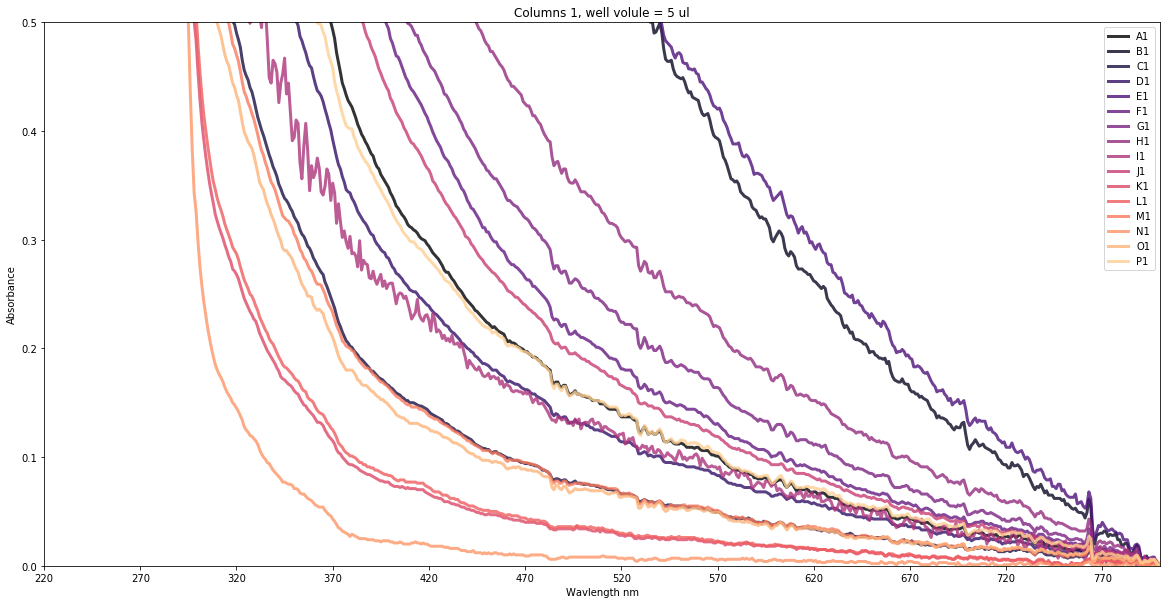

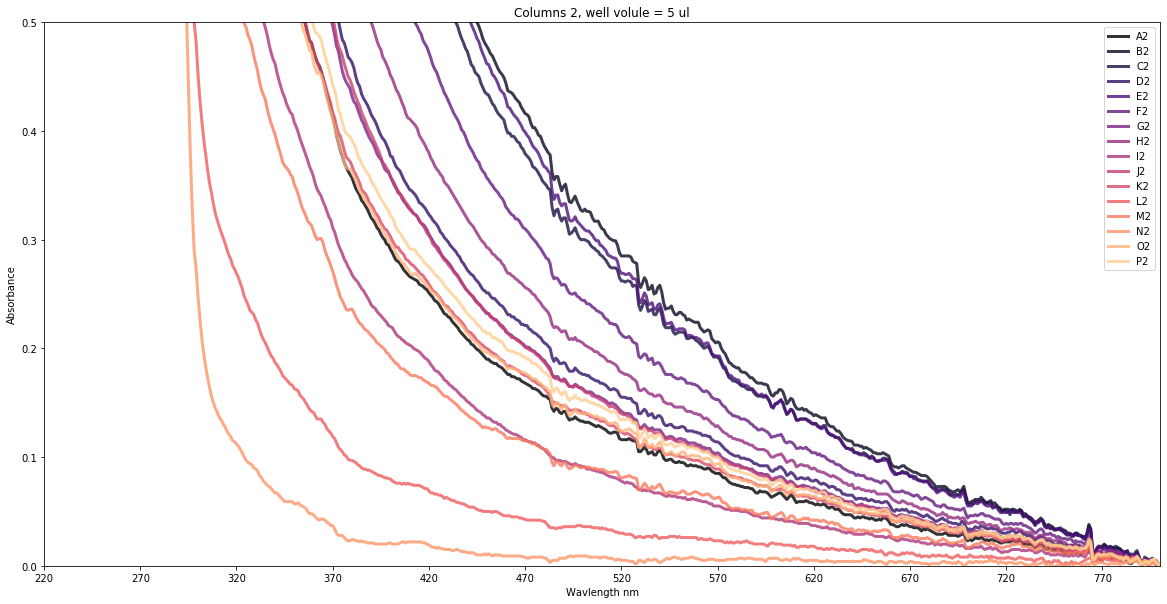

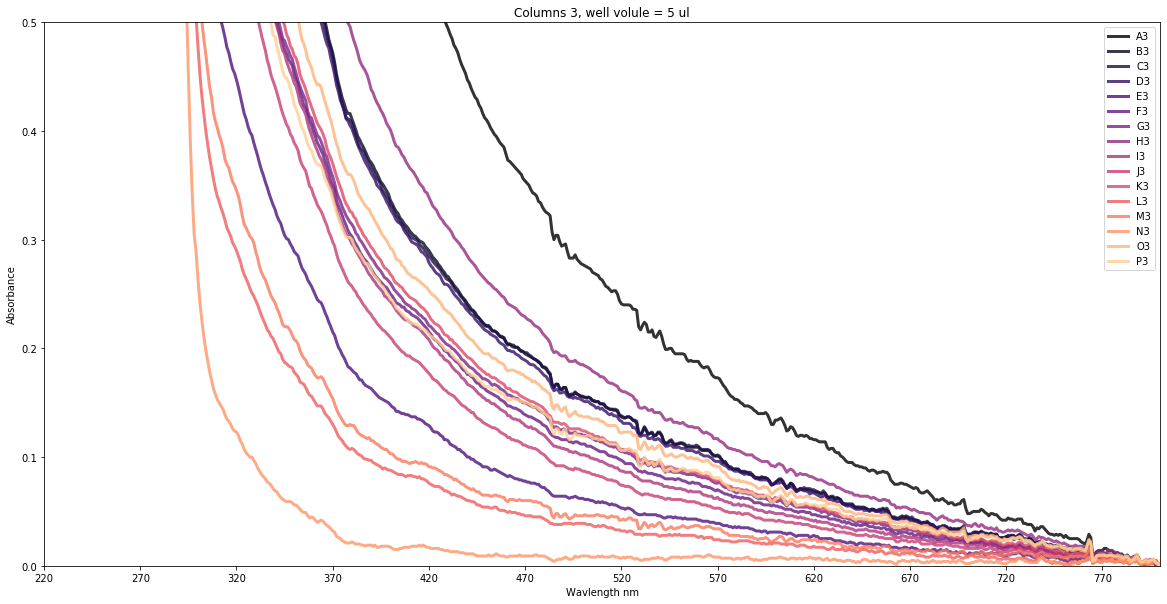

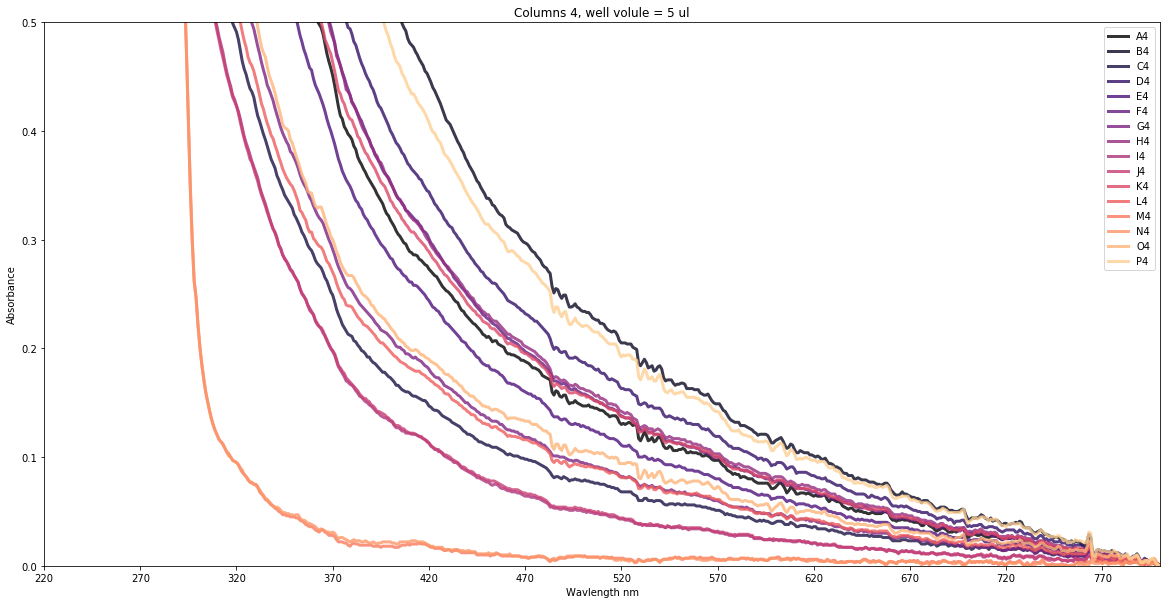

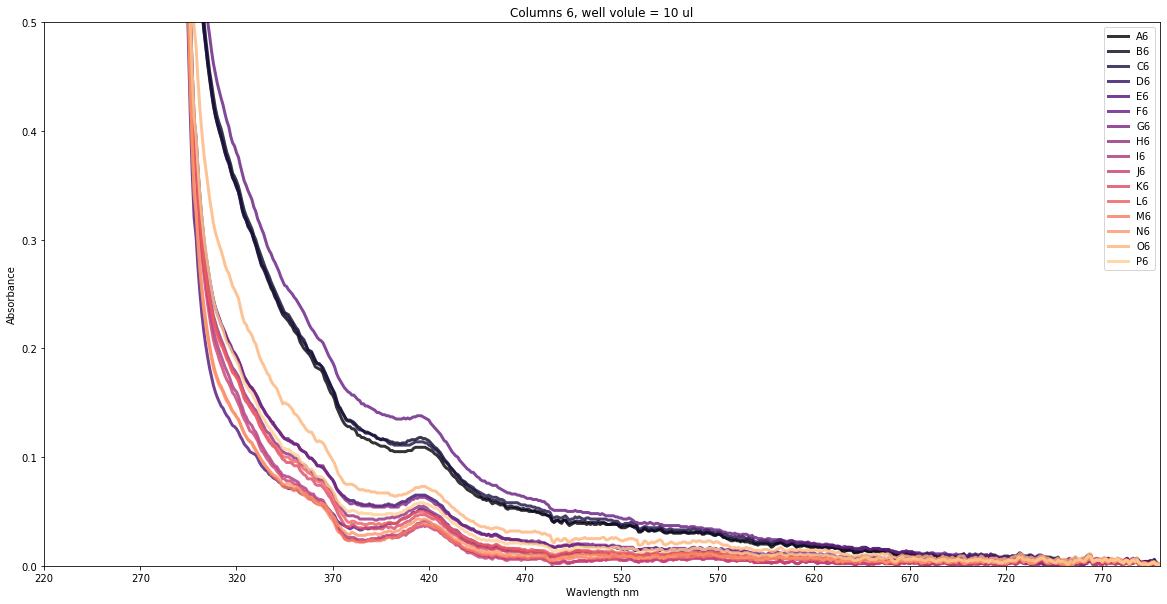

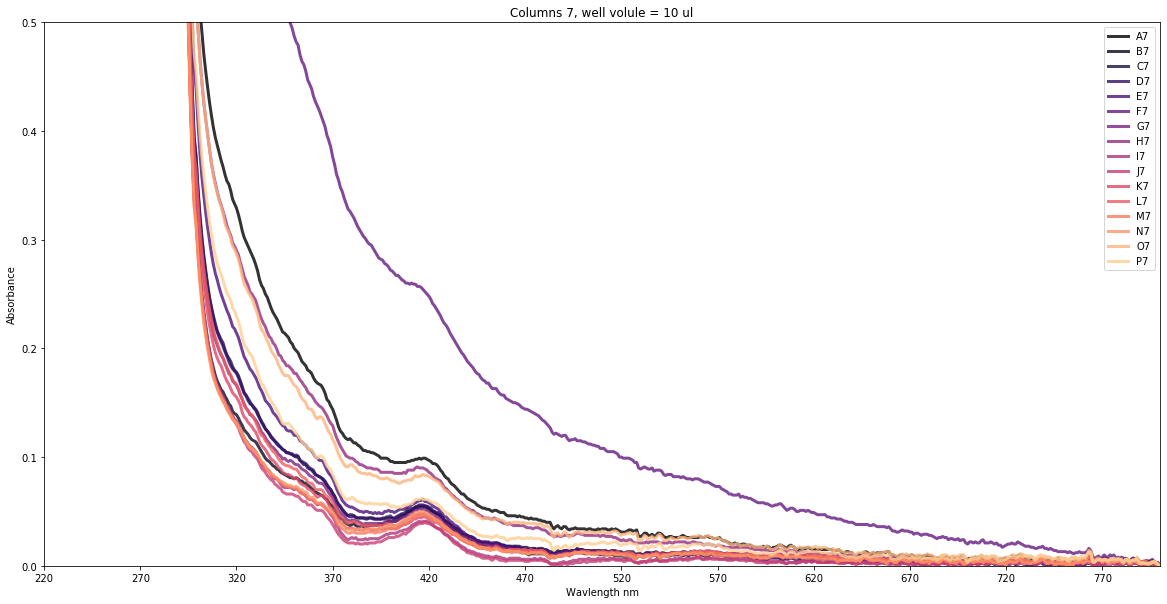

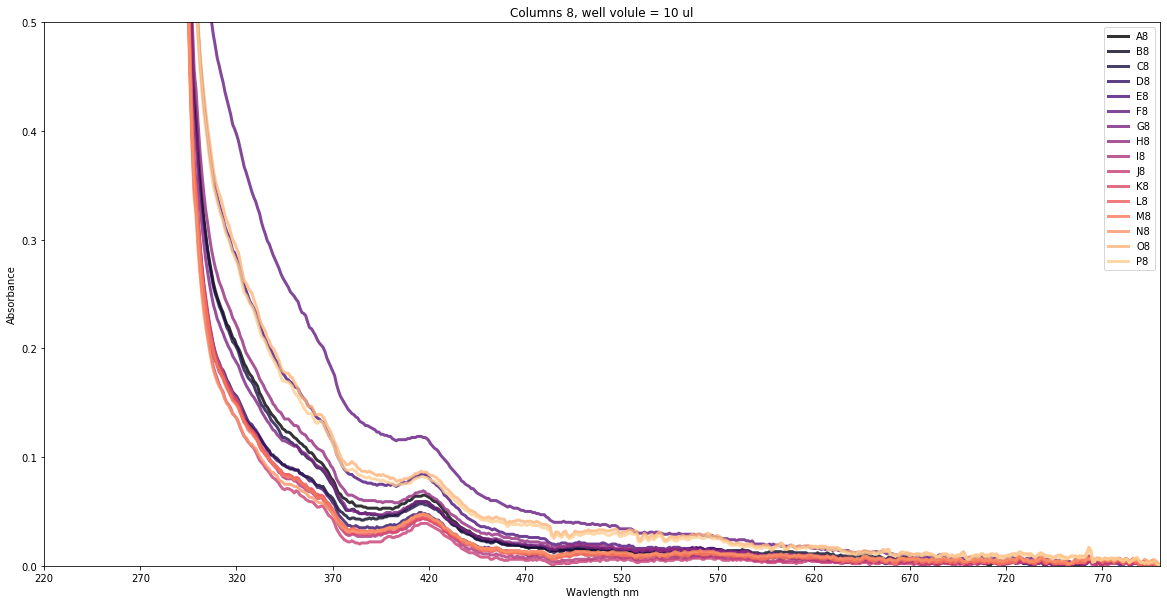

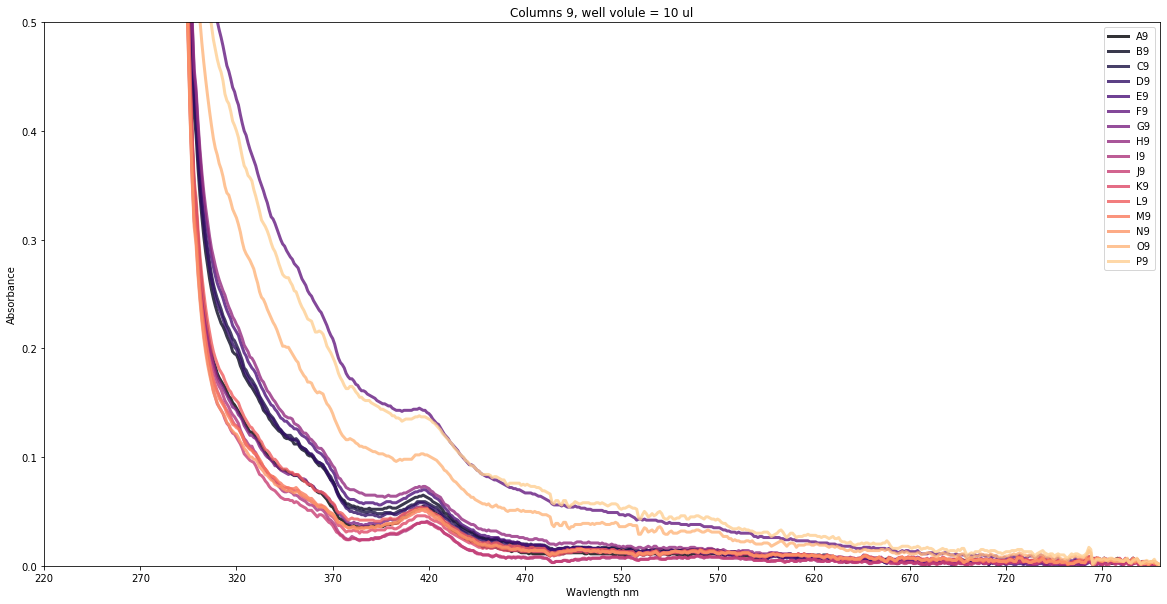

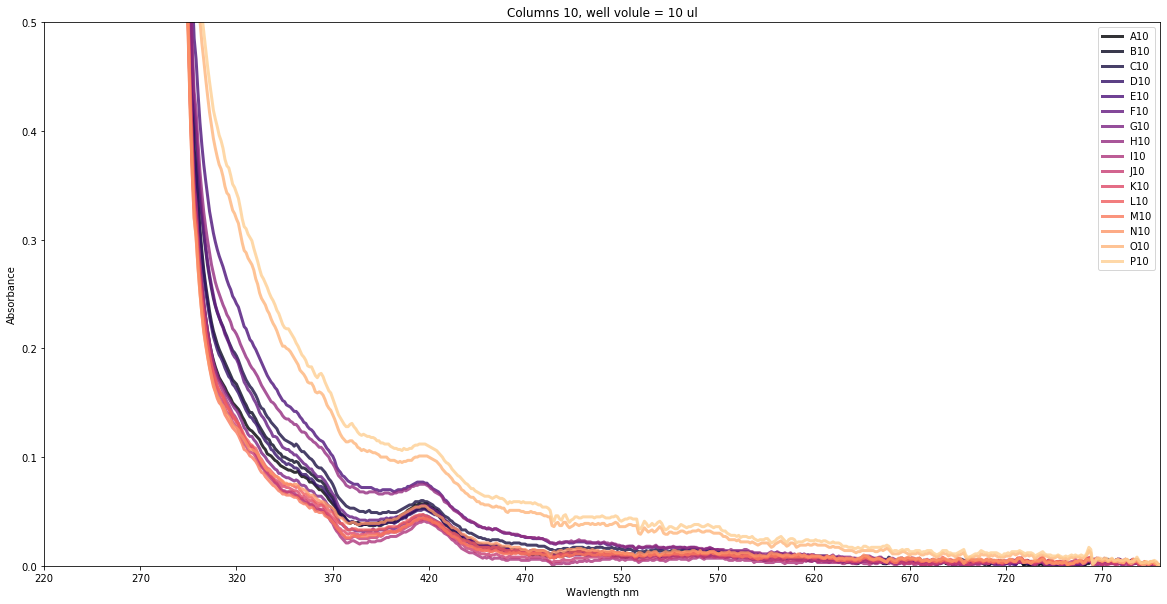

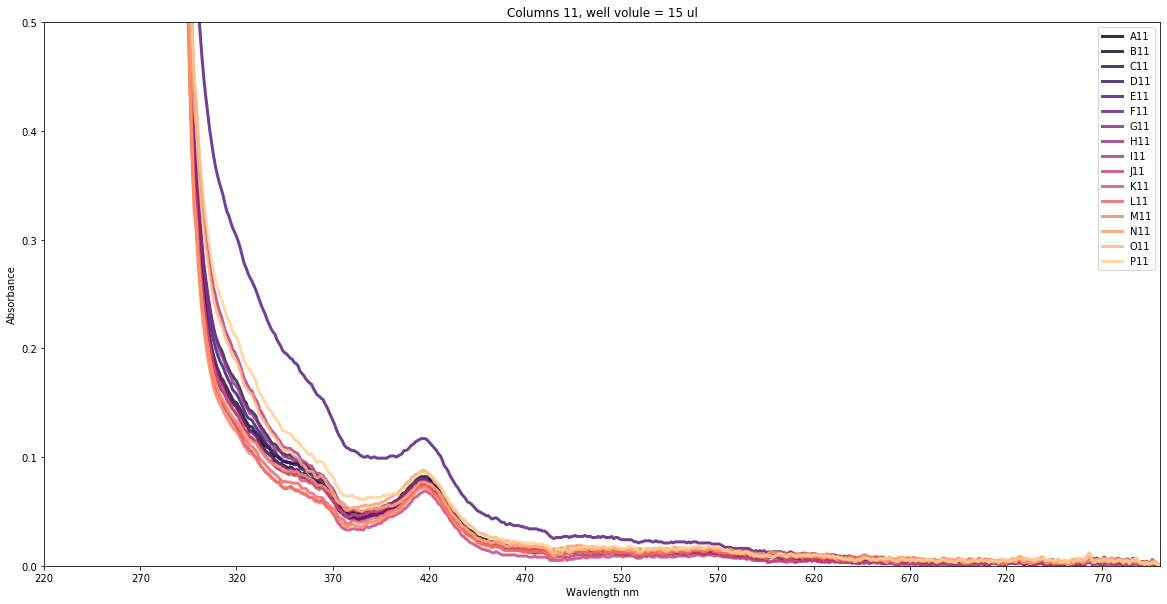

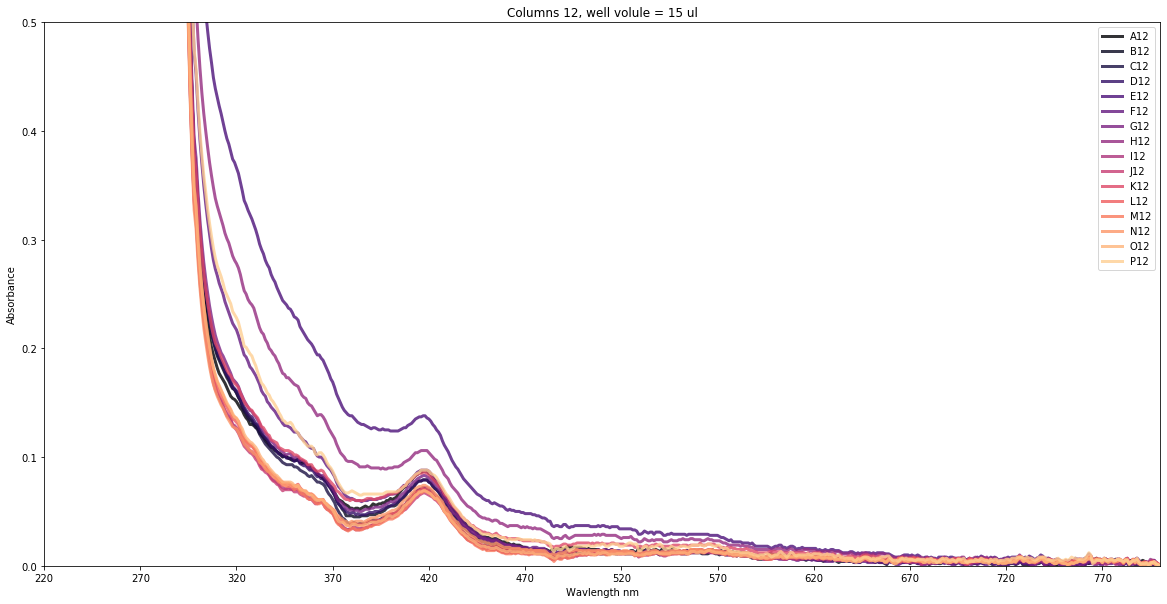

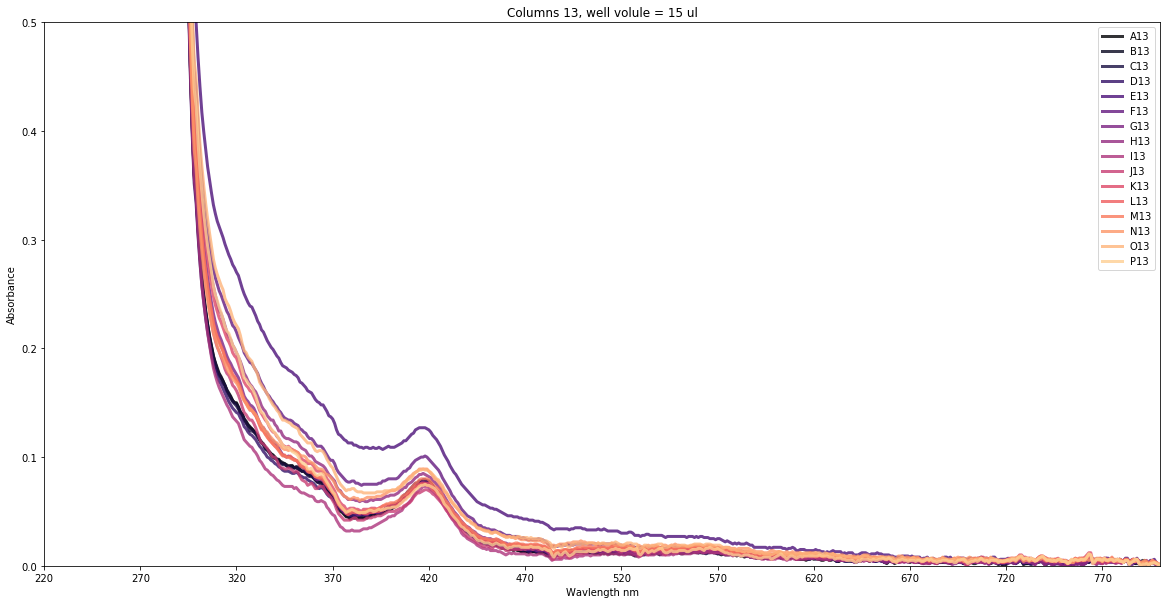

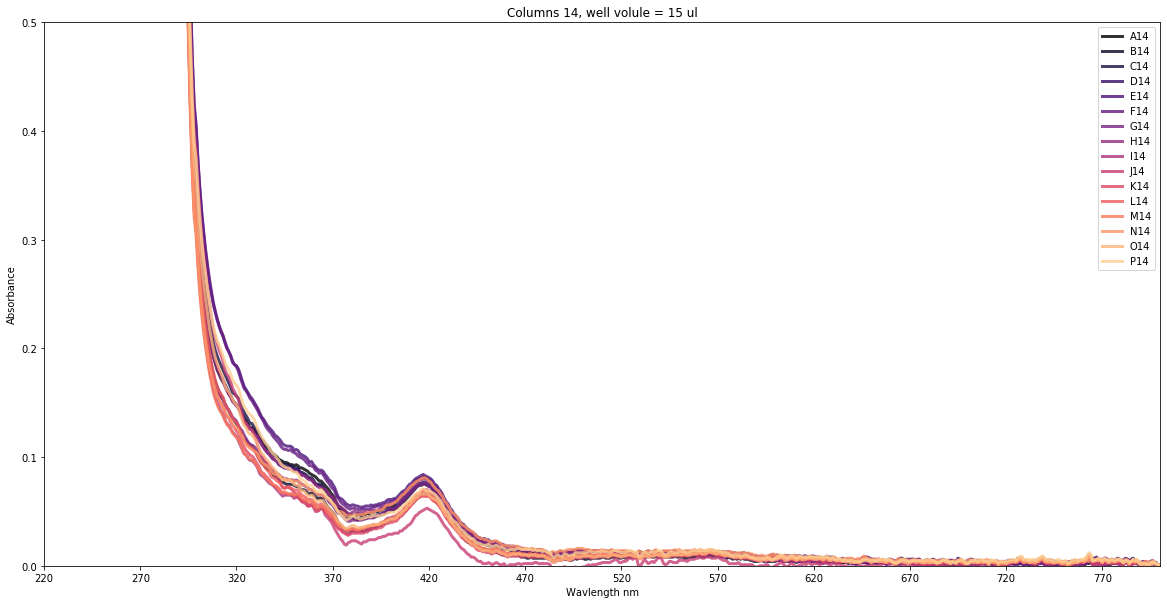

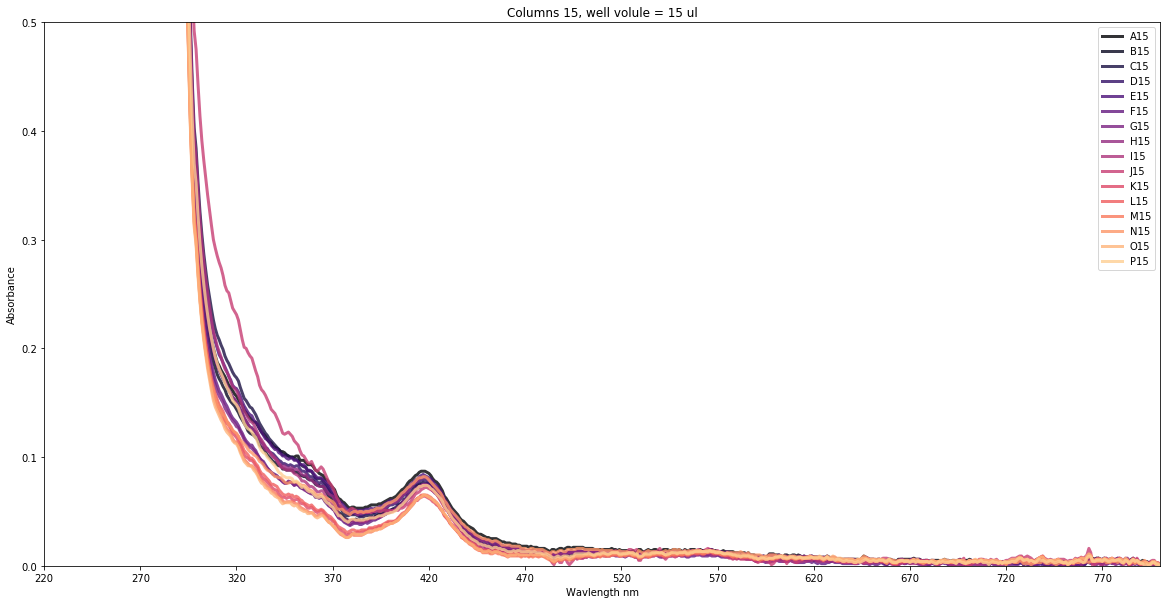

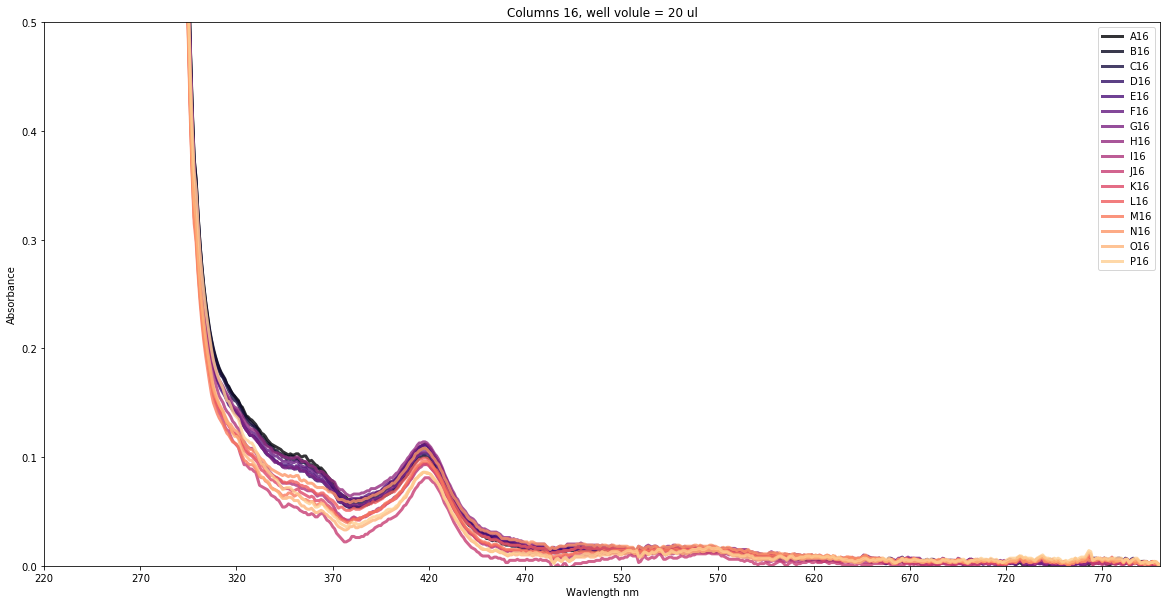

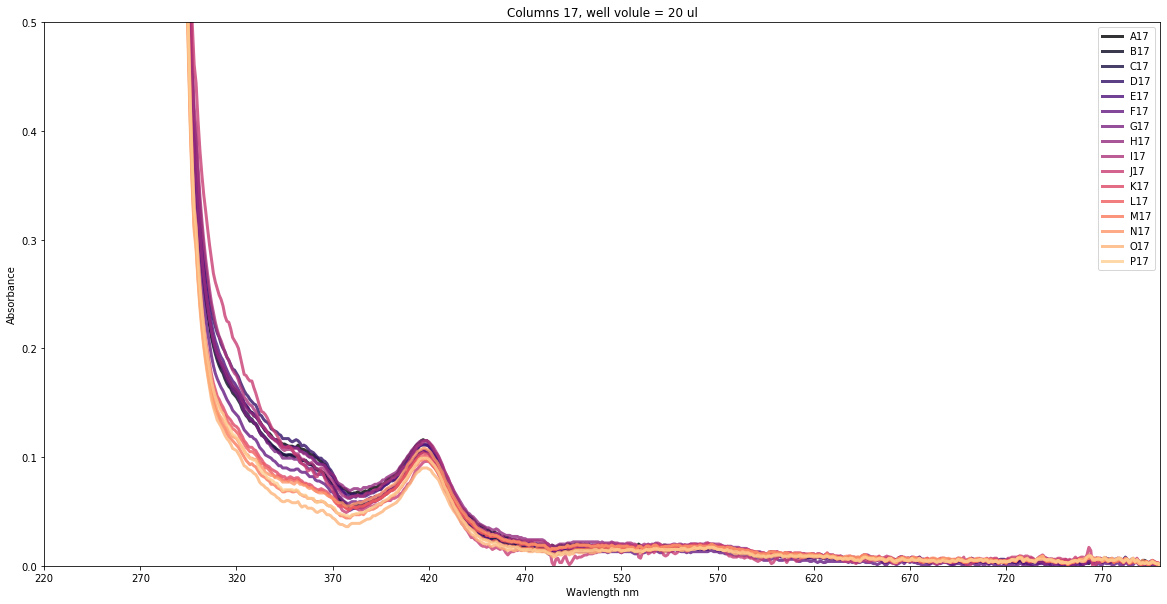

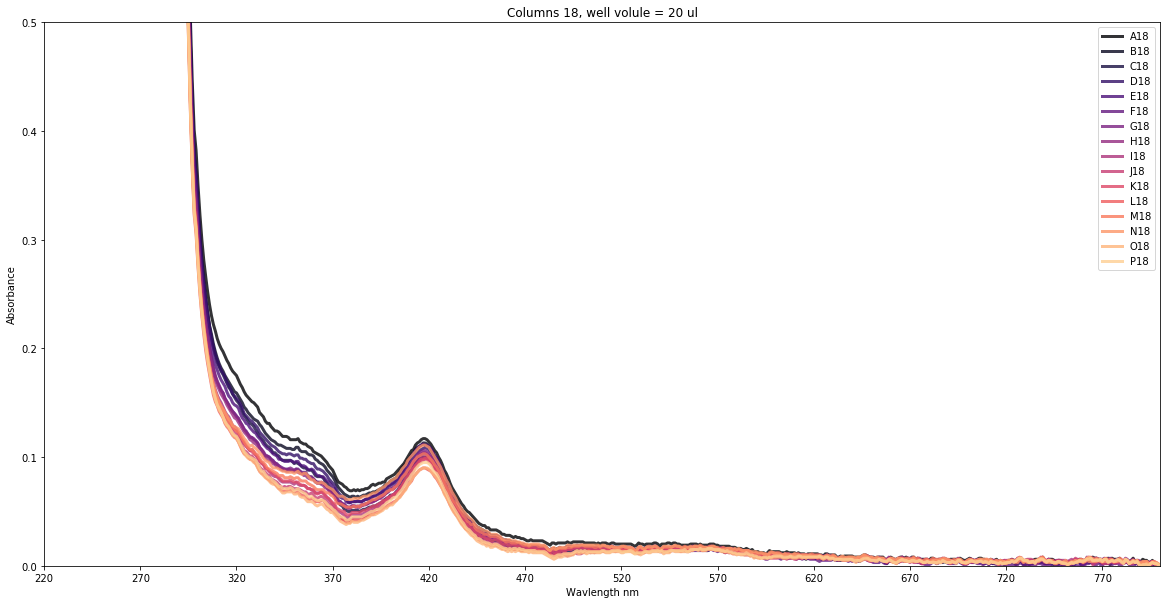

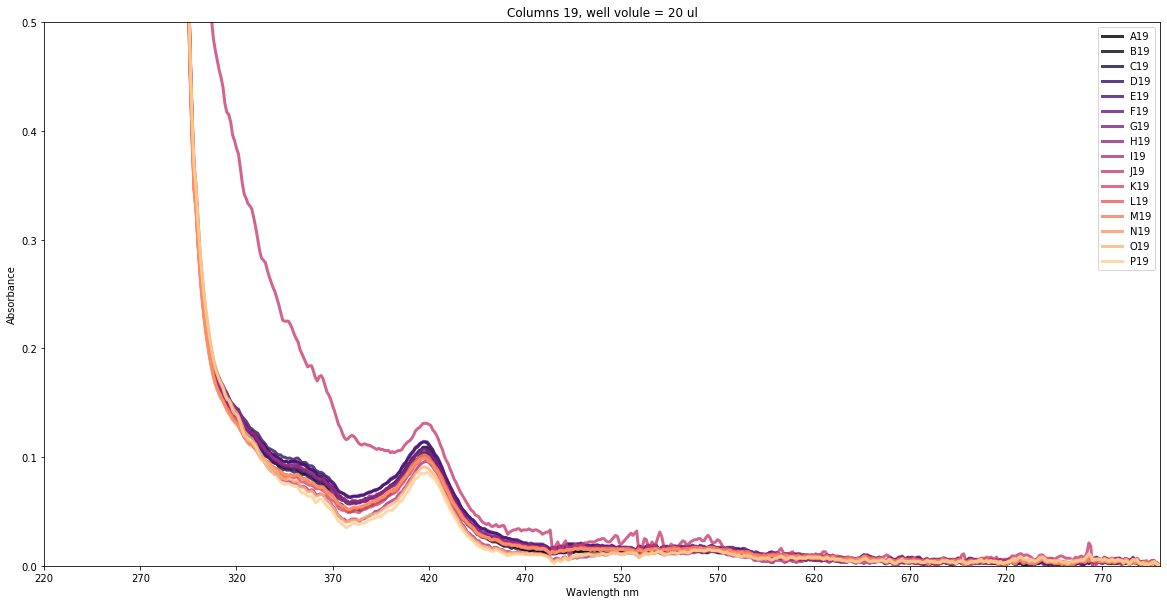

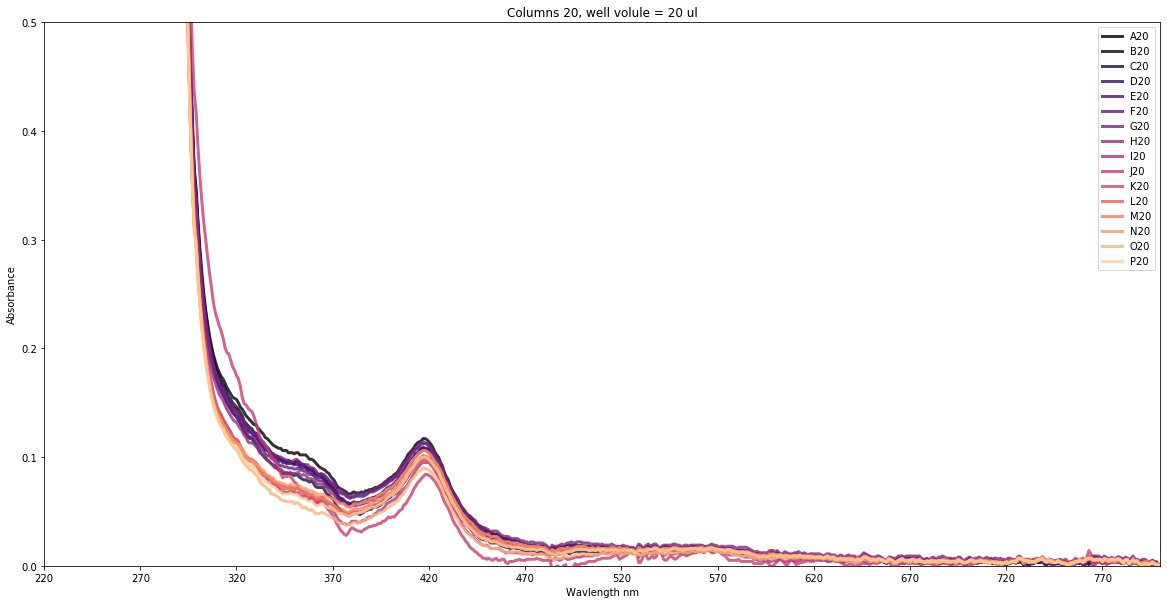

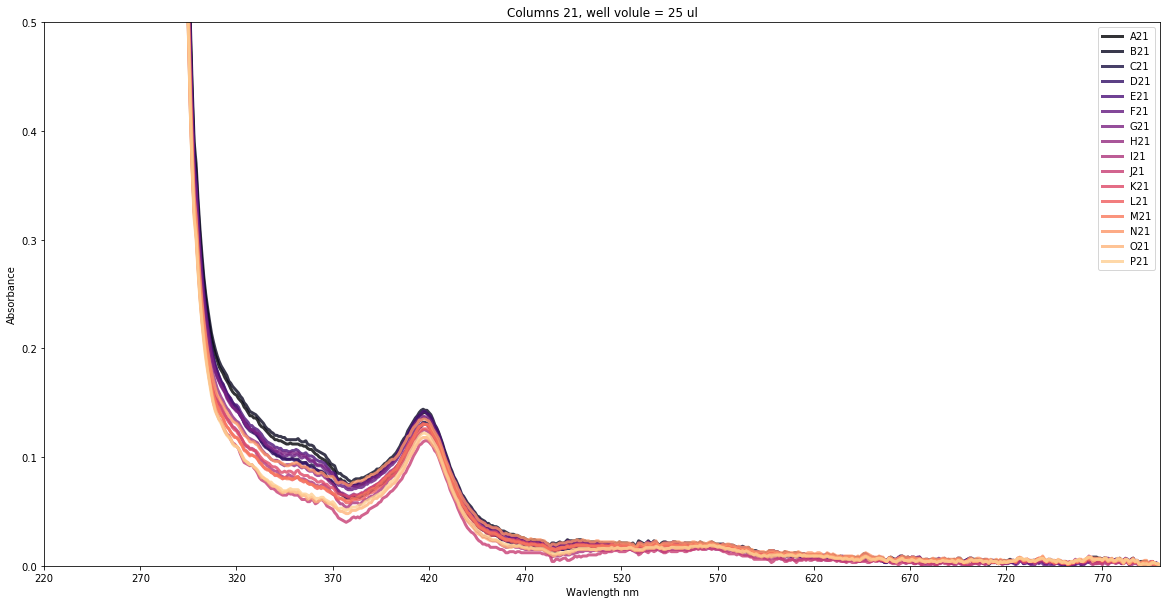

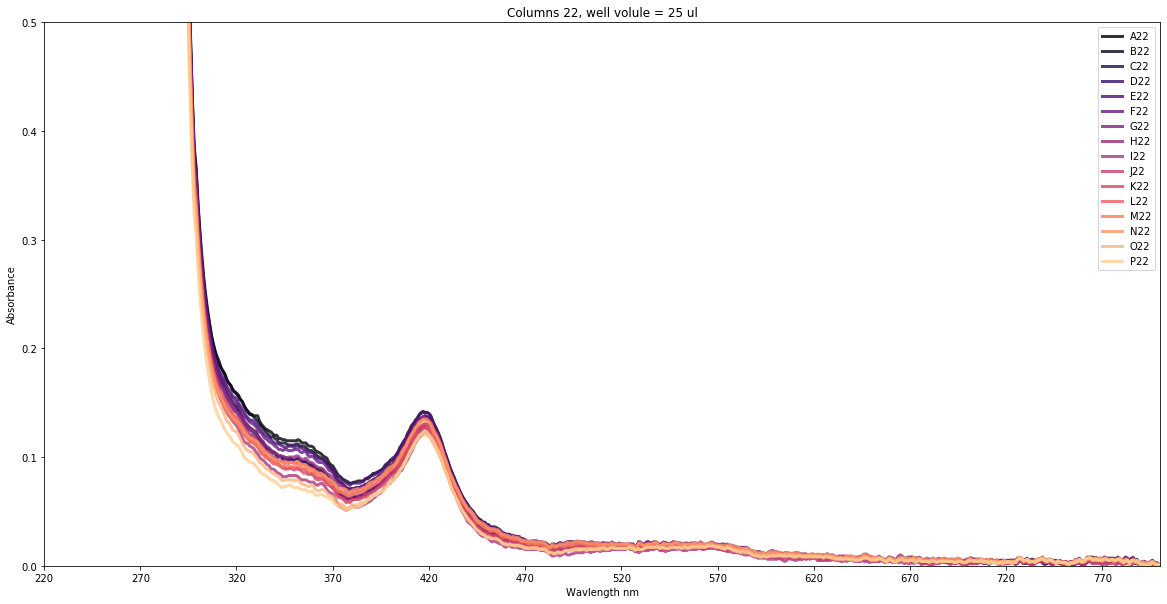

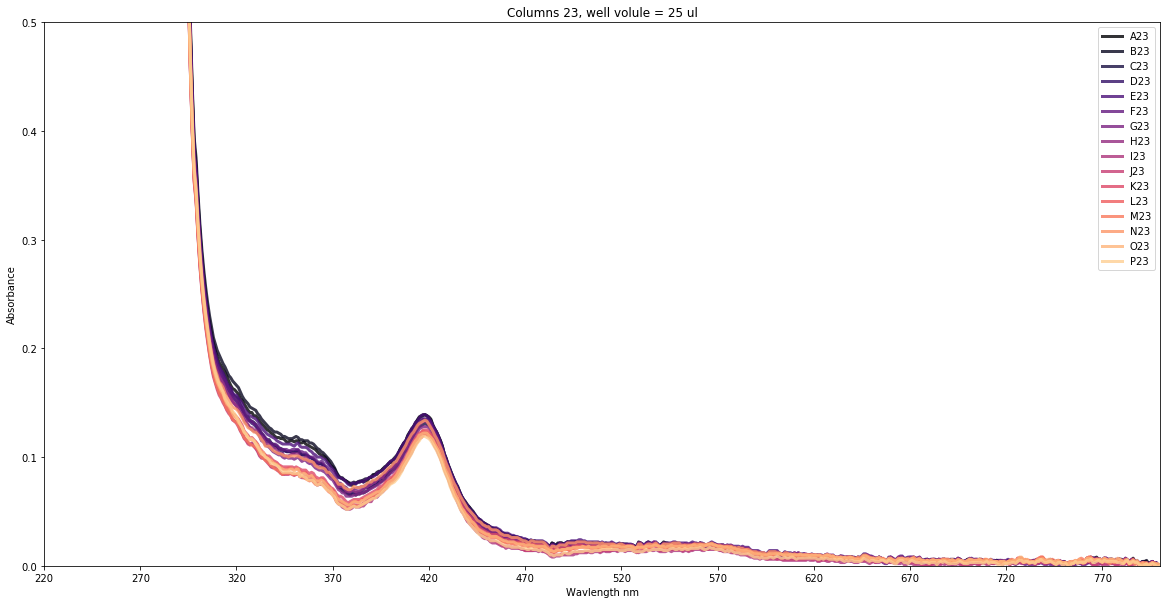

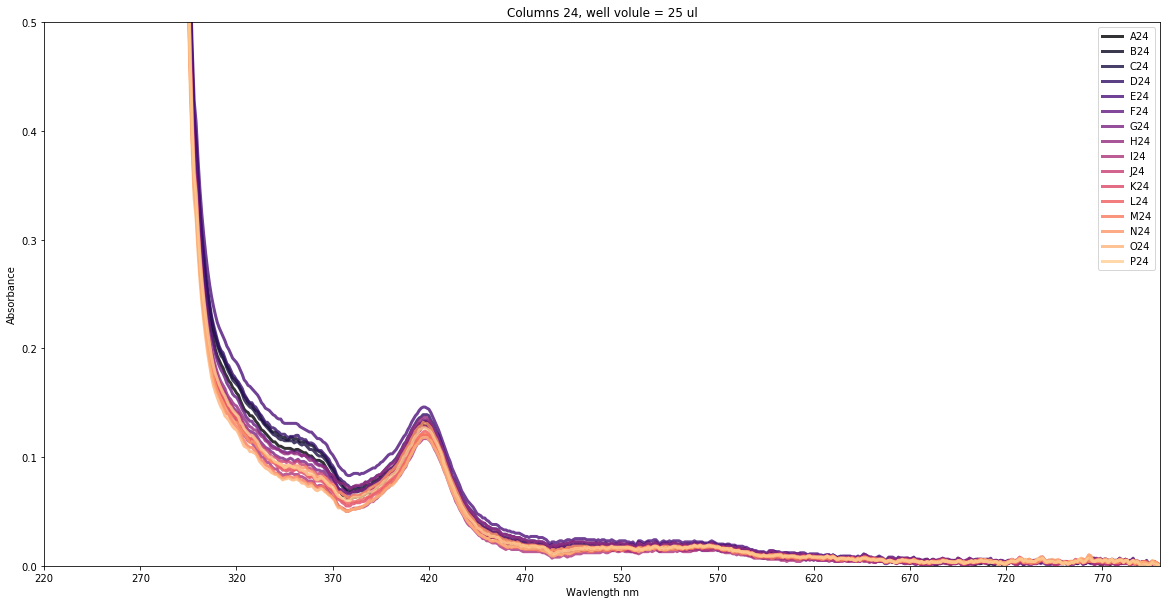

In [72]:
def getColumns(data,columnsTuple):
    numbers = pd.Series(data.index,index=data.index).str.extract('(\d+)').astype(int)[0]
    numbers = numbers.loc[numbers>=columnsTuple[0]]
    numbers = numbers.loc[numbers<=columnsTuple[1]]
    
    return data.loc[numbers.index,:]

wellVols = {1:5,2:5,3:5,4:5,6:10,7:10,8:10,9:10,10:10,11:15,12:15,13:15,14:15,15:15,16:20,17:20,18:20,19:20,20:20,
           21:25,22:25,23:25,24:25}

for i in wellVols:
    PlotTrace(getColumns(ProteinData,(i,i)),
              'Columns {}, well volule = {} ul'.format(i, wellVols[i]),
              legend=True)


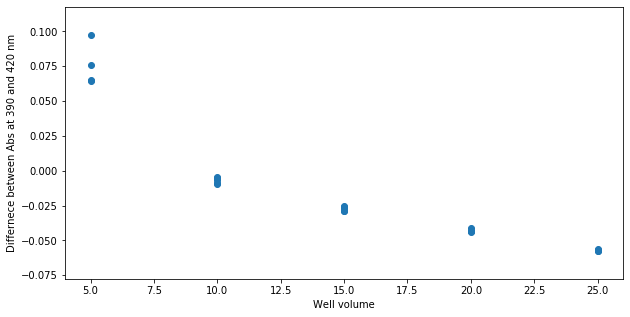

In [94]:
means = []
stds = []

for i in wellVols:
    row = getColumns(ProteinData,(i,i))
    diff= row.loc[:,390] - row.loc[:,420]
    means.append(diff.mean())
    stds.append(diff.std())
    
stds = np.array(stds)
means = np.array(means)

plt.figure(figsize = (10,5))
plt.title('')
plt.xlabel('Well volume')
plt.ylabel('Differnece between Abs at 390 and 420 nm')
plt.scatter(wellVols.values(),means)
plt.show()

In [ ]:
means = []
stds = []

for i in wellVols:
    row = getColumns(ProteinData,(i,i))
    diff= row.loc[:,390] - row.loc[:,420]
    means.append(diff.mean())
    stds.append(diff.std())

In [96]:
pd.read_csv('D_Opt.csv')

,Unnamed: 0,K-Value,% DMSO,Working Vol
0,0,1.545455,1.000000,20.0
1,1,1.000000,5.000000,20.0
2,2,2.636364,3.181818,20.0
3,3,4.000000,1.000000,20.0
4,4,4.000000,1.000000,20.0
5,5,1.545455,1.000000,20.0
6,6,1.000000,5.000000,20.0
7,7,2.636364,3.181818,20.0
8,8,2.636364,5.000000,29.0
9,9,2.636364,5.000000,29.0


In [107]:
import string
list(string.ascii_uppercase)[0:8]

blocks = {}

for i in range(1,25):
    testwells = [j+str(i) for j in list(string.ascii_uppercase)[0:8]]
    blankwells = [j+str(i) for j in list(string.ascii_uppercase)[9:16]]
    blocks[i] = [testwells,blankwells]
blocks

{1: [['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1'],
  ['J1', 'K1', 'L1', 'M1', 'N1', 'O1', 'P1']],
 2: [['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2'],
  ['J2', 'K2', 'L2', 'M2', 'N2', 'O2', 'P2']],
 3: [['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3'],
  ['J3', 'K3', 'L3', 'M3', 'N3', 'O3', 'P3']],
 4: [['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4'],
  ['J4', 'K4', 'L4', 'M4', 'N4', 'O4', 'P4']],
 5: [['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5'],
  ['J5', 'K5', 'L5', 'M5', 'N5', 'O5', 'P5']],
 6: [['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6'],
  ['J6', 'K6', 'L6', 'M6', 'N6', 'O6', 'P6']],
 7: [['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7'],
  ['J7', 'K7', 'L7', 'M7', 'N7', 'O7', 'P7']],
 8: [['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8'],
  ['J8', 'K8', 'L8', 'M8', 'N8', 'O8', 'P8']],
 9: [['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9'],
  ['J9', 'K9', 'L9', 'M9', 'N9', 'O9', 'P9']],
 10: [['A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10'],
  ['J10', 'K10', '